In [1]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [2]:
# run parameters    
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds_list = []
all_seeds_whole_list = []
files = os.listdir(path)
files = files[:10]
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    transitions = []
    all_seeds_whole_list.append(data.reset_index())
    for time in range(0,192):
        df5A = data.xs(time,level='time')
        df5B = data.xs(time+1,level='time')
        if len(df5A) != len(df5B):
            df5B = df5B[:len(df5A)-len(df5B)]
            result = df5B.where(df5A.phase!=df5B.phase).dropna()
            result['time'] = time
        transitions.append(result)
    concatenado = pd.concat(transitions)
    all_seeds_list.append(concatenado[concatenado['phase']=='S'])
all_seeds = pd.concat(all_seeds_list)

In [3]:
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'switchpoint/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

# Simulations from main/Simulating_recruitment_limit.ipynb
all_seeds2 = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data2 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = data2['0']
    all_seeds2.append(outgrowth)
all_seeds2 = pd.concat(all_seeds2, ignore_index=True, axis=1)
all_seeds2 = all_seeds2.dropna()
df_mean = np.asarray(all_seeds2.mean(axis=1))
df_std = np.asarray(all_seeds2.std(axis=1))
time = outgrowth.index/24

In [4]:
# Definitions for statistic tests for each binned day: 0-24 hours = 0-1 day, and so on
allProp = ([],[])
allTimesAnteriors = pd.DataFrame(columns = ["0-24","24-48","48-72","72-96","96-120","120-144","144-168","168-192"],index=np.arange(0,10)).fillna(0)
allTimesPosteriors = pd.DataFrame(columns = ["0-24","24-48","48-72","72-96","96-120","120-144","144-168","168-192"],index=np.arange(0,10)).fillna(0)
allTimesAnteriorsWhole = pd.DataFrame(columns = ["0-24","24-48","48-72","72-96","96-120","120-144","144-168","168-192"],index=np.arange(0,10)).fillna(0)
allTimesPosteriorsWhole = pd.DataFrame(columns = ["0-24","24-48","48-72","72-96","96-120","120-144","144-168","168-192"],index=np.arange(0,10)).fillna(0)
for seed,seedID,data in zip(all_seeds_list,np.arange(0,10),all_seeds_whole_list):
    allAnteriors = 0
    allPosteriors = 0
    allAnteriorsWhole = 0
    allPosteriorsWhole = 0   
    
    for sp,time in zip(df_mean,range(0,192)):
        
        seedTime = seed[seed['time']==time]
        dataTime = data[data['time']==time]
        
        anteriors = len(seedTime['position'].where(seedTime['position']<sp).dropna())
        allAnteriors += anteriors        
        anteriorsWhole = len(dataTime['position'].where(dataTime['position']<sp).dropna())
        allAnteriorsWhole += anteriorsWhole
        
        posteriors = len(seedTime['position'].where(seedTime['position']>=sp).dropna())
        allPosteriors += posteriors        
        posteriorsWhole = len(dataTime['position'].where(dataTime['position']>=sp).dropna())      
        allPosteriorsWhole += posteriorsWhole
        if 0<=time<24:
            allTimesAnteriors["0-24"][seedID] = allTimesAnteriors["0-24"][seedID]+anteriors
            allTimesPosteriors["0-24"][seedID] = allTimesPosteriors["0-24"][seedID]+posteriors
            allTimesAnteriorsWhole["0-24"][seedID] = allTimesAnteriorsWhole["0-24"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["0-24"][seedID] = allTimesPosteriorsWhole["0-24"][seedID]+allPosteriors
        elif 24<=time<48:
            allTimesAnteriors["24-48"][seedID] = allTimesAnteriors["24-48"][seedID]+anteriors
            allTimesPosteriors["24-48"][seedID] = allTimesPosteriors["24-48"][seedID]+posteriors
            allTimesAnteriorsWhole["24-48"][seedID] = allTimesAnteriorsWhole["24-48"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["24-48"][seedID]  = allTimesPosteriorsWhole["24-48"][seedID]+allPosteriors
        elif 48<=time<72:
            allTimesAnteriors["48-72"][seedID] = allTimesAnteriors["48-72"][seedID]+anteriors
            allTimesPosteriors["48-72"][seedID] = allTimesPosteriors["48-72"][seedID]+posteriors
            allTimesAnteriorsWhole["48-72"][seedID] = allTimesAnteriorsWhole["48-72"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["48-72"][seedID] = allTimesPosteriorsWhole["48-72"][seedID]+anteriorsWhole
        elif 72<=time<96:
            allTimesAnteriors["72-96"][seedID] = allTimesAnteriors["72-96"][seedID]+anteriors
            allTimesPosteriors["72-96"][seedID] = allTimesPosteriors["72-96"][seedID]+posteriors
            allTimesAnteriorsWhole["72-96"][seedID] = allTimesAnteriorsWhole["72-96"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["72-96"][seedID]  = allTimesPosteriorsWhole["72-96"][seedID]+allPosteriors
        elif 96<=time<120:
            allTimesAnteriors["96-120"][seedID] = allTimesAnteriors["96-120"][seedID]+anteriors
            allTimesPosteriors["96-120"][seedID] = allTimesPosteriors["96-120"][seedID]+posteriors
            allTimesAnteriorsWhole["96-120"][seedID] = allTimesAnteriorsWhole["96-120"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["96-120"][seedID]  = allTimesPosteriorsWhole["96-120"][seedID]+allPosteriors
        elif 120<=time<144:
            allTimesAnteriors["120-144"][seedID] = allTimesAnteriors["120-144"][seedID]+anteriors
            allTimesPosteriors["120-144"][seedID] = allTimesPosteriors["120-144"][seedID]+posteriors
            allTimesAnteriorsWhole["120-144"][seedID] = allTimesAnteriorsWhole["120-144"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["120-144"][seedID]  = allTimesPosteriorsWhole["120-144"][seedID]+allPosteriors
        elif 144<=time<168:
            allTimesAnteriors["144-168"][seedID] = allTimesAnteriors["144-168"][seedID]+anteriors
            allTimesPosteriors["144-168"][seedID] = allTimesPosteriors["144-168"][seedID]+posteriors
            allTimesAnteriorsWhole["144-168"][seedID] = allTimesAnteriorsWhole["144-168"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["144-168"][seedID]  = allTimesPosteriorsWhole["144-168"][seedID]+allPosteriors           
        elif 168<=time<=192:          
            allTimesAnteriors["168-192"][seedID] = allTimesAnteriors["168-192"][seedID]+anteriors
            allTimesPosteriors["168-192"][seedID] = allTimesPosteriors["168-192"][seedID]+posteriors
            allTimesAnteriorsWhole["168-192"][seedID] = allTimesAnteriorsWhole["168-192"][seedID]+anteriorsWhole
            allTimesPosteriorsWhole["168-192"][seedID]  = allTimesPosteriorsWhole["168-192"][seedID]+allPosteriors                      
    allProp[0].append(allAnteriors/allAnteriorsWhole)
    allProp[1].append(allPosteriors/allPosteriorsWhole)   
significance = 0.05
pvalue = stats.ttest_ind(allProp[0], allProp[1], alternative='two-sided') 
print("t-test:",pvalue[1]>significance)
pvalue = stats.mannwhitneyu(allProp[0], allProp[1], alternative='two-sided') 
pvalue[1]>significance
print("u-test:",pvalue[1]>significance)

t-test: False
u-test: False


In [5]:
significance = 0.05
for time,anteriors,posteriors,anteriorsWhole,posteriorsWhole in zip([0,1,2,3,4,5,6,7,8],allTimesAnteriors,allTimesPosteriors,allTimesAnteriorsWhole,allTimesPosteriorsWhole):
    print("Day",time)
    pvalue = stats.ttest_ind(allTimesAnteriors[anteriors]/allTimesAnteriorsWhole[anteriorsWhole], allTimesPosteriors[posteriors]/allTimesPosteriorsWhole[posteriorsWhole], alternative='two-sided') 
    print("t-test:",pvalue[1]>significance)
    pvalue = stats.mannwhitneyu(allTimesAnteriors[anteriors]/allTimesAnteriorsWhole[anteriorsWhole], allTimesPosteriors[posteriors]/allTimesPosteriorsWhole[posteriorsWhole], alternative='two-sided') 
    pvalue[1]>significance
    print("u-test:",pvalue[1]>significance)    
    print("#########")

Day 0
t-test: False
u-test: False
#########
Day 1
t-test: False
u-test: False
#########
Day 2
t-test: False
u-test: False
#########
Day 3
t-test: False
u-test: False
#########
Day 4
t-test: False
u-test: False
#########
Day 5
t-test: False
u-test: False
#########
Day 6
t-test: False
u-test: False
#########
Day 7
t-test: False
u-test: False
#########


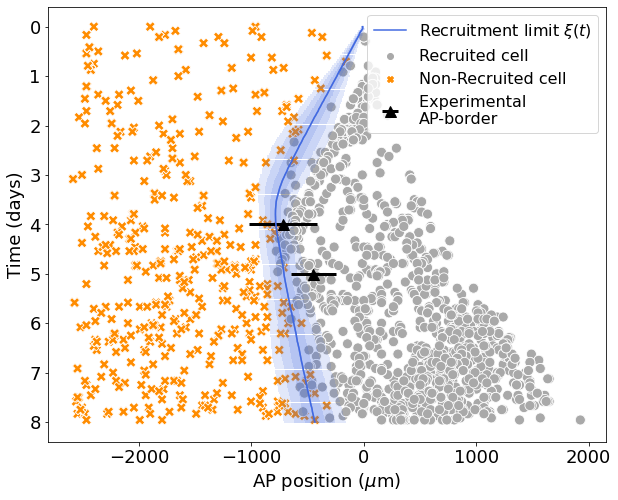

In [6]:
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})
all_seeds['time'] = all_seeds['time']/24
all_seeds['recruited'] = all_seeds['recruited'].apply(lambda x: str(x).replace('1.0', 'Recruited cell') if x==1.0 else str(x).replace('0.0', 'Non-Recruited cell'))
g = sns.scatterplot(data=all_seeds,x='position',y='time', style="recruited",hue='recruited',palette=['darkgray','darkorange'],s=100)
time = np.arange(0,193)/24
plt.plot(df_mean, time, color='royalblue', label='Recruitment limit '+r'$\xi(t)$')
plt.errorbar(df_mean,time,xerr=1*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.errorbar(df_mean,time,xerr=2*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.errorbar(df_mean,time,xerr=3*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.errorbar([-720,-450],[4,5],xerr=[300,200], color='black',ecolor='black', fmt='^',markersize=11,elinewidth=3, label='Experimental \nAP-border')
plt.legend(loc='upper right', facecolor='white', prop={'size': 16})
plt.ylabel('Time (days)')
plt.xlabel('AP position' + ' (' + r'$\mu$'+'m)')
plt.gca().invert_yaxis()
plt.savefig("./recruitment+switchpoint.png",dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# run parameters    
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
files = files[:10]
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    all_seeds.append(data[data.apply(lambda x: x['td']-1 == x['tc'], axis = 1)])
all_seeds = pd.concat(all_seeds).reset_index()

In [8]:
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'switchpoint/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds2 = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data2 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = data2['0']
    all_seeds2.append(outgrowth)
all_seeds2 = pd.concat(all_seeds2, ignore_index=True, axis=1)
all_seeds2 = all_seeds2.dropna()
df_mean = np.asarray(all_seeds2.mean(axis=1))
df_std = np.asarray(all_seeds2.std(axis=1))
time = outgrowth.index/24

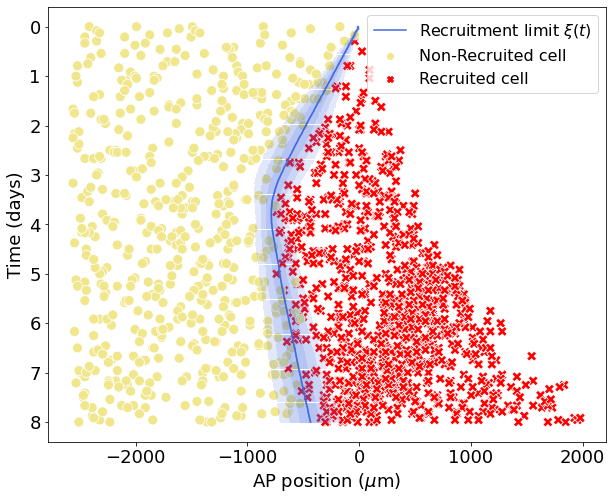

In [9]:
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})
all_seeds['time'] = all_seeds['time']/24
all_seeds['recruited'] = all_seeds['recruited'].apply(lambda x: str(x).replace('True', 'Recruited cell') if x==1.0 else str(x).replace('False', 'Non-Recruited cell'))
g = sns.scatterplot(data=all_seeds,x='position',y='time', style="recruited",hue='recruited',palette=['khaki','red'],s=100)
plt.plot(df_mean, time, color='royalblue', label='Recruitment limit '+r'$\xi(t)$')
plt.errorbar(df_mean,time,xerr=1*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.errorbar(df_mean,time,xerr=2*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.errorbar(df_mean,time,xerr=3*df_std, color='royalblue',ecolor='royalblue', alpha=0.2)
plt.legend(loc='upper right', facecolor='white', prop={'size': 16})
plt.ylabel('Time (days)')
plt.xlabel('AP position' + ' (' + r'$\mu$'+'m)')
plt.gca().invert_yaxis()
plt.savefig("./recruitment+switchpoint(M).png",dpi=300, bbox_inches='tight')
plt.show()
